#Complex Dot Product
Instead of using normal sine wave, use Complex Sine Wave

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time as ttime
import pylab as pl
from IPython import display

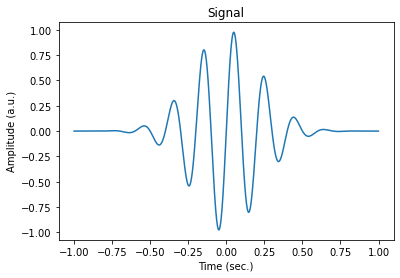

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


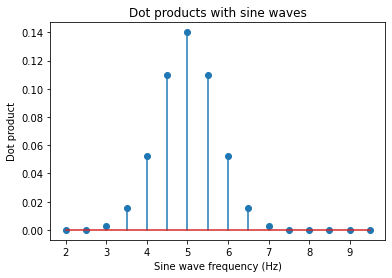

In [3]:
# phase of signal
theta = 0*np.pi/4;


# simulation parameters
srate = 1000;
time  = np.arange(-1.,1.,1./srate)

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1);
signal = np.multiply(sinew,gauss)


# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);

# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()



# initialize dot products vector
dps = np.zeros(len(sinefrex));

# loop over sine waves
for fi in range(1,len(dps)):
    
    # create sine wave
    sinew = np.exp( 1j*2*np.pi*sinefrex[fi]*time ) #Complex Sine Wave
    
    # compute dot product
    dps[fi] = np.abs( np.dot( sinew,signal ) / len(time) )


# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()

Now, play with theta. we expect no more variation of Dot product with the alteration of the phase.

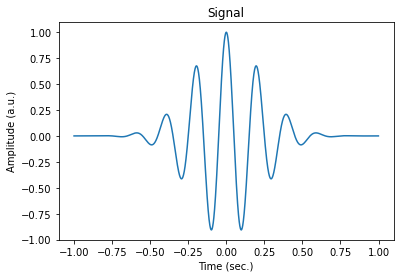

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


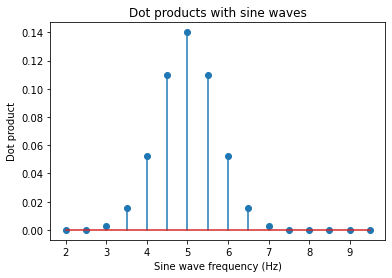

In [5]:
# phase of signal
theta = 2*np.pi/4;


# simulation parameters
srate = 1000;
time  = np.arange(-1.,1.,1./srate)

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1);
signal = np.multiply(sinew,gauss)


# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);

# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()



# initialize dot products vector
dps = np.zeros(len(sinefrex));

# loop over sine waves
for fi in range(1,len(dps)):
    
    # create sine wave
    sinew = np.exp( 1j*2*np.pi*sinefrex[fi]*time ) #Complex Sine Wave
    
    # compute dot product
    dps[fi] = np.abs( np.dot( sinew,signal ) / len(time) )


# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()

Observation: No change.

#Q.Why?

A. The Complex Sine Wave contains two sine waves at the same time. There is Cosine corresponding to the Real part & Sine Corresponding to the Imaginary part.

So, the intersection of Sine & Cosine determines where the dot product is, on the complex plane. While the magnitude of the Dot Product Remains the Same, viz, the distance from the origin.

More Details

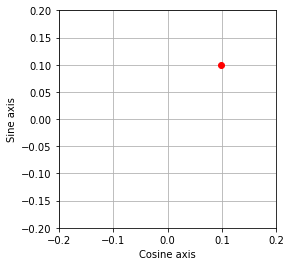

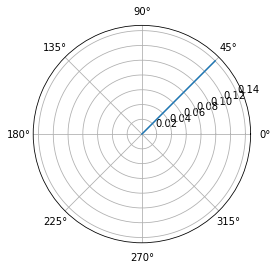

In [6]:
# in more detail...

# phase of signal
theta = 1*np.pi/4;

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1)
signal = np.multiply(sinew,gauss)

# create sine and cosine waves
sinew = np.sin( 2*np.pi*5*time )
cosnw = np.cos( 2*np.pi*5*time )

# compute dot products
dps = np.dot( sinew,signal ) / len(time)
dpc = np.dot( cosnw,signal ) / len(time)

# combine sine and cosine into complex dot product
dp_complex = np.complex(dpc,dps) 
mag = np.abs(dp_complex)
phs = np.angle(dp_complex)

# and plot
plt.plot( dpc , dps ,'ro')
plt.xlabel('Cosine axis')
plt.ylabel('Sine axis')
plt.axis('square')
plt.grid(True)
plt.axis([-.2,.2,-.2,.2])
plt.show()

# draw a line using polar notation
plt.polar([phs,phs],[0,mag])
plt.show()

You may play around with the phase of the Waves. What matters is, only the angle with the x-axis changes & not the distance from the origin.

KeyboardInterrupt: ignored

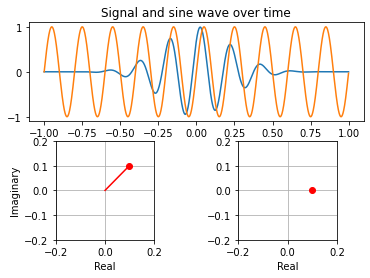

In [11]:
## illustration of the effect of phase offsets on dot products

# create complex sine wave
csw = np.exp( 1j*2*np.pi*5*time )
rsw = np.sin(    2*np.pi*5*time )

# specify range of phase offsets for signal
phases = np.linspace(0,7*np.pi/2,num=100)


for phi in range(0,len(phases)):
    
    # create signal
    sinew  = np.sin(2*np.pi*5*time + phases[phi])
    gauss  = np.exp( (-time**2) / .1)
    signal = np.multiply(sinew,gauss)

    # compute complex dot product
    cdp = np.sum( np.multiply(signal,csw) ) / len(time)

    # compute real-valued dot product
    rdp = sum( np.multiply(signal,rsw) ) / len(time)

    # plot signal and real part of sine wave
    pl.cla() # wipe the figure
    plt.subplot2grid((2,2), (0, 0), colspan=2)
    plt.plot(time,signal)
    plt.plot(time,rsw)
    plt.title('Signal and sine wave over time')

    # plot complex dot product
    plt.subplot2grid((2,2), (1, 0))
    plt.plot(np.real(cdp),np.imag(cdp),'ro')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.axis('square')
    plt.grid(True)
    plt.axis([-.2,.2,-.2,.2])
    plt.plot([0,np.real(cdp)],[0,np.imag(cdp)],'r')


    # draw normal dot product
    plt.subplot2grid((2,2), (1, 1))
    plt.plot(rdp,0,'ro')
    plt.xlabel('Real')
    plt.axis('square')
    plt.grid(True)
    plt.axis([-.2,.2,-.2,.2])


    # show plot    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    ttime.sleep(.01)
